# GENERAL NOTES

https://www.youtube.com/watch?v=ZBCLIvznxnI&ab_channel=MachineLearningMindset

TODO: 
- check their correcting encoding to utf-8
- find a way to analyse the vocabulary (cause remove low frequency words)


other ressources:
- https://colab.research.google.com/github/janlukasschroeder/nlp-cheat-sheet-python/blob/master/NLP-Cheat-Sheet.ipynb
- 




new problems:
- how do i define the vocabulary for BERT model if resumes can have new words? real life example is trained on big dataset and thenuse cv to better learn?

# Data Analysis 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np

df_job = pd.read_csv("jobads_dataset.csv",index_col='Unnamed: 0',converters={'job_category': eval}) 
categories_list = pd.read_csv("categories_list.csv",index_col='Unnamed: 0',converters={'category': literal_eval})
 
with open('skill_list.txt') as f:
    skill_list = [line.strip() for line in f]

categories_list.info()
categories_list

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40 non-null     object
dtypes: object(1)
memory usage: 640.0+ bytes


category
0     [Accounting, Auditing, Taxation]
1                 [Admin, Secretarial]
2                 [Advertising, Media]
3      [Architecture, Interior Design]
4                [Banking and Finance]
5          [Building and Construction]
6                         [Consulting]
7                   [Customer Service]
8                             [Design]
9             [Education and Training]
10                       [Engineering]
11                     [Entertainment]
12               [Environment, Health]
13                [Events, Promotions]
14                [General Management]
15                      [General Work]
16        [Healthcare, Pharmaceutical]
17                       [Hospitality]
18                   [Human Resources]
19            [Information Technology]
20                         [Insurance]
21                             [Legal]
22           [Logistics, Supply Chain]
23                     [Manufacturing]
24       [Marketing, Public Relations]
25         [Medical, Therapy Services]
26                            [Others]
27             [Personal Care, Beauty]
28             [Precision Engineering]
29             [Professional Services]
30             [Public, Civil Service]
31         [Purchasing, Merchandising]
32  [Real Estate, Property Management]
33            [Repair and Maintenance]
34                   [Risk Management]
35                     [Sales, Retail]
36        [Security and Investigation]
37                   [Social Services]
38                [Telecommunications]
39                   [Travel, Tourism]

In [2]:
df_job.info()
df_job

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20298 entries, 0 to 20297
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             20298 non-null  object
 1   skills_required  20298 non-null  object
 2   job_category     20298 non-null  object
dtypes: object(3)
memory usage: 634.3+ KB


text  \
0      providing support director admin manager assis...   
1      company overview google conventional company i...   
2      manager manager job involves vast array duties...   
3      undertaking various active directory projects ...   
4      provide l2 support sap hcm related issues trou...   
...                                                  ...   
20293  project coordinator integral member project te...   
20294  responsibilities support juniper network infra...   
20295  assist section manager planning resources sche...   
20296  main responsibilities preparation management v...   
20297  design authority diverse engineering projects ...   

                                         skills_required job_category  
0      ['Access', 'Customer Service', 'Data Entry', '...          [1]  
1      ['Adobe Creative Suite', 'Advertising', 'Art D...          [8]  
2      ['Active Directory', 'Business Analysis', 'Cha...         [19]  
3      ['Analysis', 'Business Analysis', 'Business De...         [19]  
4      ['Analysis', 'Business Analysis', 'Business De...         [19]  
...                                                  ...          ...  
20293  ['Budgets', 'Customer Service', 'Event Managem...          [3]  
20294  ['BGP', 'Cisco Technologies', 'Cloud Computing...         [19]  
20295  ['Budgets', 'Change Orders', 'Commissioning', ...         [12]  
20296  ['AV', 'Continuous Improvement', 'Customer Ser...         [26]  
20297  ['AutoCAD', 'Civil Engineering', 'Commissionin...         [10]  

[20298 rows x 3 columns]

## JobAds analysis TODOOO

In [3]:
#distribution of skills per jobad

#TODOOOOO

## Skill labels analysis

In [4]:
print("len(skill_list): ",len(skill_list))
skill_list

len(skill_list):  2548


['Access',
 'Customer Service',
 'Data Entry',
 'Employee Relations',
 'English',
 'Event Planning',
 'Human Resources',
 'Leadership',
 'Management',
 'Microsoft Excel',
 'Microsoft Office',
 'Microsoft Word',
 'Outlook',
 'PowerPoint',
 'Public Speaking',
 'Research',
 'Social Media',
 'Team Leadership',
 'Teamwork',
 'Time Management',
 'Adobe Creative Suite',
 'Advertising',
 'Art Direction',
 'AutoCAD',
 'Concept Development',
 'Creative Direction',
 'Graphic Design',
 'Graphics',
 'Illustration',
 'Illustrator',
 'InDesign',
 'Interaction Design',
 'Logo Design',
 'Photography',
 'Photoshop',
 'Typography',
 'User Experience',
 'User Interface Design',
 'Web Design',
 'Active Directory',
 'Business Analysis',
 'Change Management',
 'Cloud Computing',
 'Data Center',
 'Disaster Recovery',
 'Integration',
 'IT Management',
 'IT Operations',
 'IT Service Management',
 'IT Strategy',
 'ITIL',
 'Networking',
 'Program Management',
 'Project Management',
 'Troubleshooting',
 'Vendor Ma

In [5]:
d_skills_jobads = {skill:[] for skill in skill_list}


def fill_dict_skills_jobads(row):
    #print("row:",row,type(row))
    #print(row["index_value"],"row['skills_required']:",row['skills_required'],type(row['skills_required']))
    if row['skills_required'] == "not_available":
        return
    for skill in literal_eval(row['skills_required']):
        if skill in d_skills_jobads.keys():
            d_skills_jobads[skill].append(row["index_value"])
        else:
            print("ERROR: skill not in dict: ",skill)
    #print("d_skills_jobads: ",d_skills_jobads)
    return None


df_job["index_value"] = df_job.index
df_job.apply(fill_dict_skills_jobads,axis=1)

d_skills_jobads

{'Access': [0,
  261,
  383,
  435,
  445,
  463,
  553,
  561,
  659,
  703,
  848,
  861,
  896,
  1008,
  1044,
  1073,
  1135,
  1174,
  1185,
  1202,
  1296,
  1425,
  1535,
  1779,
  2083,
  2217,
  2300,
  2430,
  2434,
  2501,
  2624,
  2766,
  2872,
  2962,
  3069,
  3125,
  3176,
  3419,
  3453,
  3485,
  3543,
  3620,
  3816,
  3823,
  3838,
  3860,
  4083,
  4130,
  4165,
  4229,
  4234,
  4263,
  4314,
  4370,
  4378,
  4426,
  4509,
  4529,
  4574,
  4603,
  4616,
  4657,
  4662,
  4723,
  4738,
  4749,
  4772,
  4797,
  4803,
  4856,
  4924,
  4937,
  5020,
  5028,
  5062,
  5151,
  5229,
  5285,
  5295,
  5315,
  5336,
  5389,
  5572,
  5649,
  5785,
  5875,
  5887,
  5927,
  5928,
  5968,
  6110,
  6132,
  6154,
  6219,
  6349,
  6355,
  6470,
  6593,
  6594,
  6679,
  6704,
  6945,
  7002,
  7029,
  7051,
  7093,
  7126,
  7551,
  7625,
  7695,
  7763,
  7837,
  7844,
  7865,
  7888,
  7915,
  7934,
  7965,
  8106,
  8110,
  8120,
  8142,
  8159,
  8181,
  8318,
  836

ord_indexes: [  8  53   7 ... 526 528 527] <class 'numpy.ndarray'>
skills_names: ['Access', 'Customer Service', 'Data Entry', 'Employee Relations', 'English', 'Event Planning', 'Human Resources', 'Leadership', 'Management', 'Microsoft Excel', 'Microsoft Office', 'Microsoft Word', 'Outlook', 'PowerPoint', 'Public Speaking', 'Research', 'Social Media', 'Team Leadership', 'Teamwork', 'Time Management', 'Adobe Creative Suite', 'Advertising', 'Art Direction', 'AutoCAD', 'Concept Development', 'Creative Direction', 'Graphic Design', 'Graphics', 'Illustration', 'Illustrator', 'InDesign', 'Interaction Design', 'Logo Design', 'Photography', 'Photoshop', 'Typography', 'User Experience', 'User Interface Design', 'Web Design', 'Active Directory', 'Business Analysis', 'Change Management', 'Cloud Computing', 'Data Center', 'Disaster Recovery', 'Integration', 'IT Management', 'IT Operations', 'IT Service Management', 'IT Strategy', 'ITIL', 'Networking', 'Program Management', 'Project Management', 'Tr

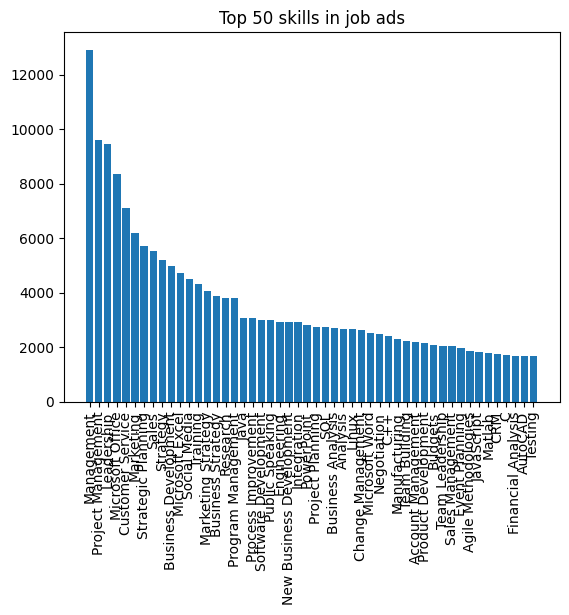

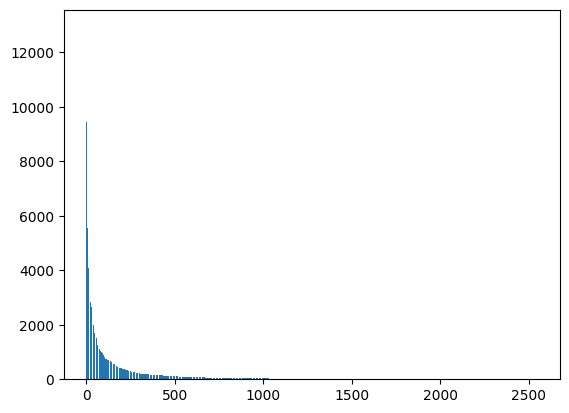

In [6]:
#
skills_names = list(d_skills_jobads.keys())
count_skills_jobads = [len(d_skills_jobads[skill]) for skill in skills_names]

k_top = 50
ord_indexes = np.argsort(count_skills_jobads)[::-1]
print("ord_indexes:",ord_indexes,type(ord_indexes))
print("skills_names:",skills_names,type(skills_names))
print("count_skills_jobads:",count_skills_jobads,type(count_skills_jobads))

ord_skill_counts = np.array(count_skills_jobads)[ord_indexes]
ord_skill_list_string = np.array(skills_names)[ord_indexes]
k_top_counts = ord_skill_counts[:k_top]
k_top_skills_names = ord_skill_list_string[:k_top]


plt.xticks(rotation='vertical')
plt.bar(k_top_skills_names,k_top_counts)
plt.title("Top "+str(k_top)+" skills in job ads")
plt.show()


plt.bar(range(len(skill_list)),ord_skill_counts)
plt.show()

d_count_skills_jobads: {'Access': 279, 'Customer Service': 7124, 'Data Entry': 576, 'Employee Relations': 651, 'English': 728, 'Event Planning': 1990, 'Human Resources': 1239, 'Leadership': 9451, 'Management': 12914, 'Microsoft Excel': 4735, 'Microsoft Office': 8346, 'Microsoft Word': 2545, 'Outlook': 674, 'PowerPoint': 2822, 'Public Speaking': 3002, 'Research': 3814, 'Social Media': 4519, 'Team Leadership': 2066, 'Teamwork': 1275, 'Time Management': 1202, 'Adobe Creative Suite': 226, 'Advertising': 1555, 'Art Direction': 198, 'AutoCAD': 1689, 'Concept Development': 177, 'Creative Direction': 260, 'Graphic Design': 314, 'Graphics': 174, 'Illustration': 172, 'Illustrator': 264, 'InDesign': 319, 'Interaction Design': 187, 'Logo Design': 184, 'Photography': 169, 'Photoshop': 1076, 'Typography': 176, 'User Experience': 202, 'User Interface Design': 178, 'Web Design': 237, 'Active Directory': 792, 'Business Analysis': 2727, 'Change Management': 2634, 'Cloud Computing': 910, 'Data Center': 7

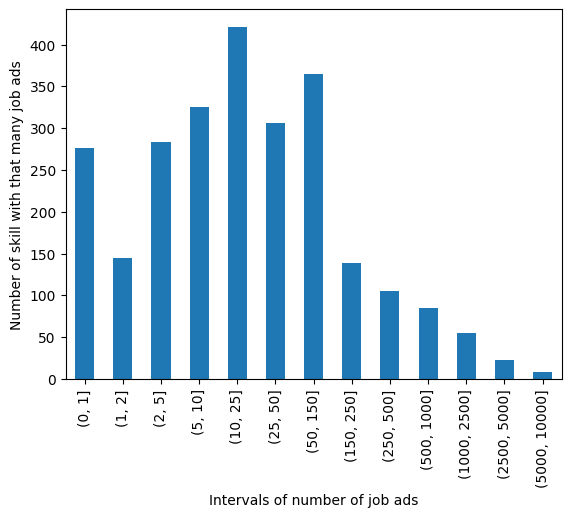

In [7]:
count_skills_jobads
d_count_skills_jobads = { skill:len(d_skills_jobads[skill]) for skill in skills_names}
print("d_count_skills_jobads:",d_count_skills_jobads)

def show_in_buckets(dict,bins_cutoff):
    print(list(dict.items()))
    df = pd.DataFrame(list(dict.items()),columns=["skill","counts"])
    print("buckets_count_skills_jobads:",df.head())
    
    print("bins_cutoff:",bins_cutoff)
    df["bucket"] = pd.cut(df.counts, bins_cutoff)
    print("buckets_count_skills_jobads:",df)


    bins = df['bucket'].unique().dropna()
    print("bins:",bins)
    ordered_bins = np.sort(bins)


    df['bucket'].value_counts()[ordered_bins].plot(kind='bar')
    plt.xlabel('Intervals of number of job ads')
    plt.ylabel('Number of skill with that many job ads')
    plt.show()

    return df

bins_cutoff = np.array([0,1,2,5,10,25,50,150,250,500,1000,2500,5000,10000])
df = show_in_buckets(d_count_skills_jobads,bins_cutoff)


In [8]:
print("They are 987 skills that are only present in a sinlge job ad --> NEED TO REMOVE SOME SKILLS\n\n")

count_skills_jobads = [len(d_skills_jobads[skill]) for skill in skills_names]
ordered_skill_counts = np.sort(np.array(count_skills_jobads))[::-1]

def index_first_smaller(list,threshold):
    for i in range(len(list)):
        if list[i] < threshold:
            return i
    return -1

def print_nb_skills_with_cutoff(min_nb_cv_cutoff):
    cutoff_counts = index_first_smaller(ordered_skill_counts,min_nb_cv_cutoff)
    print("with min_nb_cv_cutoff = ",min_nb_cv_cutoff," we have ",cutoff_counts," skills with more than ",min_nb_cv_cutoff," job ads")
    print("so we have ",len(ordered_skill_counts)-cutoff_counts," that would be removed ")


print("there %d different skills in total" % len(ordered_skill_counts))
print_nb_skills_with_cutoff(10)
print_nb_skills_with_cutoff(20)
print_nb_skills_with_cutoff(30)
print_nb_skills_with_cutoff(50)



They are 987 skills that are only present in a sinlge job ad --> NEED TO REMOVE SOME SKILLS


there 2548 different skills in total
with min_nb_cv_cutoff =  10  we have  1551  skills with more than  10  job ads
so we have  997  that would be removed 
with min_nb_cv_cutoff =  20  we have  1209  skills with more than  20  job ads
so we have  1339  that would be removed 
with min_nb_cv_cutoff =  30  we have  1022  skills with more than  30  job ads
so we have  1526  that would be removed 
with min_nb_cv_cutoff =  50  we have  789  skills with more than  50  job ads
so we have  1759  that would be removed 


In [9]:
cutoff_counts = 20
d_count_skills_cutoff = { skill:len(d_skills_jobads[skill]) for skill in skills_names if len(d_skills_jobads[skill]) > cutoff_counts}
print("d_count_skills_cutoff of length ",len(d_count_skills_cutoff)," :",d_count_skills_cutoff)


d_count_skills_cutoff of length  1192  : {'Access': 279, 'Customer Service': 7124, 'Data Entry': 576, 'Employee Relations': 651, 'English': 728, 'Event Planning': 1990, 'Human Resources': 1239, 'Leadership': 9451, 'Management': 12914, 'Microsoft Excel': 4735, 'Microsoft Office': 8346, 'Microsoft Word': 2545, 'Outlook': 674, 'PowerPoint': 2822, 'Public Speaking': 3002, 'Research': 3814, 'Social Media': 4519, 'Team Leadership': 2066, 'Teamwork': 1275, 'Time Management': 1202, 'Adobe Creative Suite': 226, 'Advertising': 1555, 'Art Direction': 198, 'AutoCAD': 1689, 'Concept Development': 177, 'Creative Direction': 260, 'Graphic Design': 314, 'Graphics': 174, 'Illustration': 172, 'Illustrator': 264, 'InDesign': 319, 'Interaction Design': 187, 'Logo Design': 184, 'Photography': 169, 'Photoshop': 1076, 'Typography': 176, 'User Experience': 202, 'User Interface Design': 178, 'Web Design': 237, 'Active Directory': 792, 'Business Analysis': 2727, 'Change Management': 2634, 'Cloud Computing': 910

d_count_skills_cutoff of length  1192  : {'Access': 279, 'Customer Service': 7124, 'Data Entry': 576, 'Employee Relations': 651, 'English': 728, 'Event Planning': 1990, 'Human Resources': 1239, 'Leadership': 9451, 'Management': 12914, 'Microsoft Excel': 4735, 'Microsoft Office': 8346, 'Microsoft Word': 2545, 'Outlook': 674, 'PowerPoint': 2822, 'Public Speaking': 3002, 'Research': 3814, 'Social Media': 4519, 'Team Leadership': 2066, 'Teamwork': 1275, 'Time Management': 1202, 'Adobe Creative Suite': 226, 'Advertising': 1555, 'Art Direction': 198, 'AutoCAD': 1689, 'Concept Development': 177, 'Creative Direction': 260, 'Graphic Design': 314, 'Graphics': 174, 'Illustration': 172, 'Illustrator': 264, 'InDesign': 319, 'Interaction Design': 187, 'Logo Design': 184, 'Photography': 169, 'Photoshop': 1076, 'Typography': 176, 'User Experience': 202, 'User Interface Design': 178, 'Web Design': 237, 'Active Directory': 792, 'Business Analysis': 2727, 'Change Management': 2634, 'Cloud Computing': 910

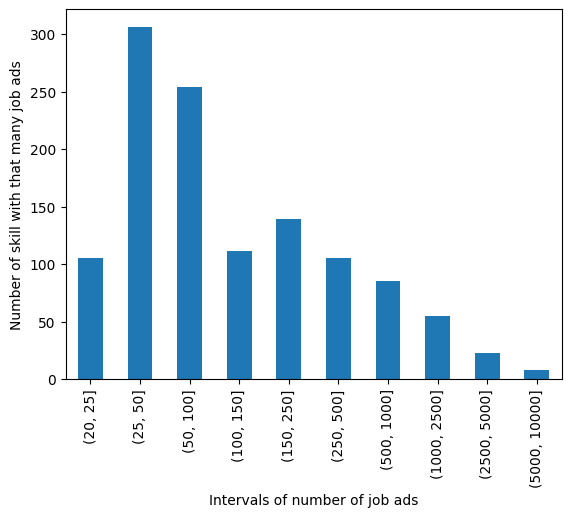

In [10]:
print("d_count_skills_cutoff of length ",len(d_count_skills_cutoff)," :",d_count_skills_cutoff)


def show_in_buckets(dict,bins_cutoff):
    print(list(dict.items()))
    df = pd.DataFrame(list(dict.items()),columns=["skill","counts"])
    print("buckets_count_skills_jobads:",df.head())
    
    print("bins_cutoff:",bins_cutoff)
    df["bucket"] = pd.cut(df.counts, bins_cutoff)
    print("buckets_count_skills_jobads:",df)


    bins = df['bucket'].unique().dropna()
    print("bins:",bins)
    ordered_bins = np.sort(bins)


    df['bucket'].value_counts()[ordered_bins].plot(kind='bar')
    plt.xlabel('Intervals of number of job ads')
    plt.ylabel('Number of skill with that many job ads')
    plt.show()

    return df



bins_cutoff = np.array([1,10,20,25,50,100,150,250,500,1000,2500,5000,10000])
df_cutoff_counts_skills = show_in_buckets(d_count_skills_cutoff,bins_cutoff)

In [11]:
bins = df_cutoff_counts_skills['bucket'].unique().dropna()
ordered_bins = np.sort(bins)

skills_with_low_jobadsNb = list(df_cutoff_counts_skills[df_cutoff_counts_skills.bucket == ordered_bins[0]].skill)
print("skills present in ",ordered_bins[0]," jobads:",skills_with_low_jobadsNb)
skills_with_low_jobadsNb = list(df_cutoff_counts_skills[df_cutoff_counts_skills.bucket == ordered_bins[1]].skill)
print("skills present in ",ordered_bins[1]," jobads:",skills_with_low_jobadsNb)

skills present in  (20, 25]  jobads: ['Cabling', 'Petroleum Engineering', 'Project Coordination', 'International Development', 'Design Thinking', 'Magazines', 'PPAP', 'Environmental Consulting', 'Environmental Science', 'Water Quality', 'Bridal Showers', 'Cosmetology', 'Hair Care', 'Hair Cutting', 'Hair Straightening', 'Salons', 'Waxing', 'Freight', 'Project Delivery', 'VoIP', 'Loss Prevention', 'Store Operations', 'Alternative Dispute Resolution', 'Appeals', 'Construction Law', 'Dispute', 'Professional Negligence', 'Equity Derivatives', 'Structured Products', 'Content Management', 'Condos', 'Listings', 'New Home Sales', 'Referrals', 'Relocation', 'Security Awareness', 'Opera', 'Performance Testing', 'Electrical Troubleshooting', 'Brand Architecture', 'High Availability', 'Tax Advisory', 'Tax Law', 'Band', 'Chamber Music', 'Choral', 'Ensemble', 'Piano', 'Singing', 'Songwriting', 'Program Evaluation', 'Trading Strategies', 'Data Integration', 'Master Data Management', 'CPM Scheduling', 

## job categories analysis

In [12]:
df_job.info()
df_job.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20298 entries, 0 to 20297
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             20298 non-null  object
 1   skills_required  20298 non-null  object
 2   job_category     20298 non-null  object
 3   index_value      20298 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 792.9+ KB


text  \
0  providing support director admin manager assis...   
1  company overview google conventional company i...   
2  manager manager job involves vast array duties...   
3  undertaking various active directory projects ...   
4  provide l2 support sap hcm related issues trou...   

                                     skills_required job_category  index_value  
0  ['Access', 'Customer Service', 'Data Entry', '...          [1]            0  
1  ['Adobe Creative Suite', 'Advertising', 'Art D...          [8]            1  
2  ['Active Directory', 'Business Analysis', 'Cha...         [19]            2  
3  ['Analysis', 'Business Analysis', 'Business De...         [19]            3  
4  ['Analysis', 'Business Analysis', 'Business De...         [19]            4

categories_list:                               category
0     [Accounting, Auditing, Taxation]
1                 [Admin, Secretarial]
2                 [Advertising, Media]
3      [Architecture, Interior Design]
4                [Banking and Finance]
5          [Building and Construction]
6                         [Consulting]
7                   [Customer Service]
8                             [Design]
9             [Education and Training]
10                       [Engineering]
11                     [Entertainment]
12               [Environment, Health]
13                [Events, Promotions]
14                [General Management]
15                      [General Work]
16        [Healthcare, Pharmaceutical]
17                       [Hospitality]
18                   [Human Resources]
19            [Information Technology]
20                         [Insurance]
21                             [Legal]
22           [Logistics, Supply Chain]
23                     [Manufacturing]
24      

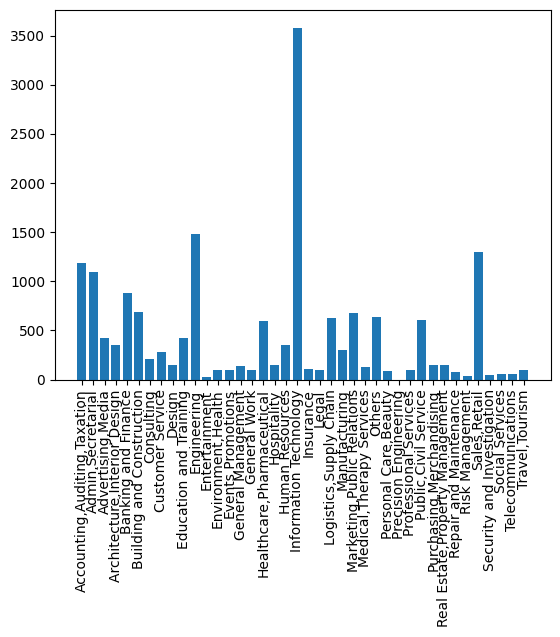

In [13]:
category_counts = [0 for i in range(len(categories_list))]

def count_categories(entry):
    for ind in entry['job_category']:
        category_counts[ind] += 1
    return -1

df_job.apply(count_categories,axis=1)

cat_list_string = [','.join(ele) for ele in categories_list['category'].values.tolist()]
print("categories_list:",categories_list)
print("cat_list_string:",cat_list_string)
print("category_counts:",category_counts)

plot = plt.bar(cat_list_string, category_counts)
plt.xticks(rotation='vertical')
plt.show()

category_counts: [1187, 1095, 418, 354, 882, 691, 204, 282, 149, 421, 1481, 25, 100, 101, 140, 97, 593, 144, 355, 3583, 110, 92, 623, 297, 677, 131, 638, 91, 0, 102, 608, 151, 145, 73, 32, 1299, 48, 54, 58, 99] <class 'list'>
cat_list_string: ['Accounting,Auditing,Taxation', 'Admin,Secretarial', 'Advertising,Media', 'Architecture,Interior Design', 'Banking and Finance', 'Building and Construction', 'Consulting', 'Customer Service', 'Design', 'Education and Training', 'Engineering', 'Entertainment', 'Environment,Health', 'Events,Promotions', 'General Management', 'General Work', 'Healthcare,Pharmaceutical', 'Hospitality', 'Human Resources', 'Information Technology', 'Insurance', 'Legal', 'Logistics,Supply Chain', 'Manufacturing', 'Marketing,Public Relations', 'Medical,Therapy Services', 'Others', 'Personal Care,Beauty', 'Precision Engineering', 'Professional Services', 'Public,Civil Service', 'Purchasing,Merchandising', 'Real Estate,Property Management', 'Repair and Maintenance', 'Risk 

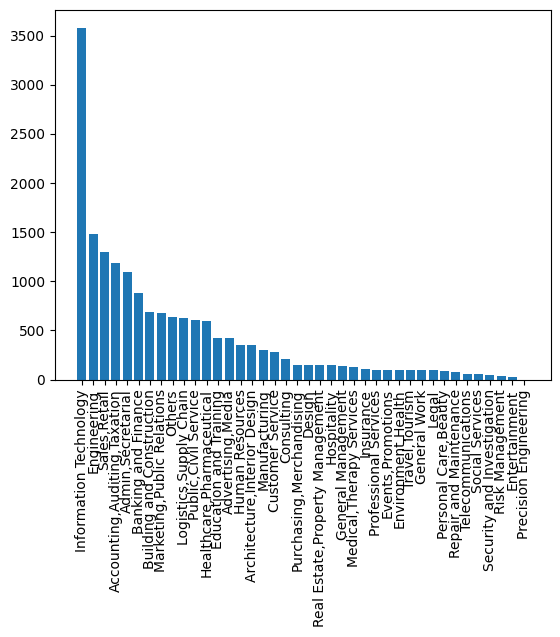

In [14]:
print("category_counts:",category_counts,type(category_counts))
print("cat_list_string:",cat_list_string,type(cat_list_string))


k_top = len(categories_list)
ord_indexes = np.argsort(category_counts)[::-1][:k_top]
print("ord_indexes:",ord_indexes,type(ord_indexes))
ord_category_counts = np.array(category_counts)[ord_indexes]
ord_cat_list_string = np.array(cat_list_string)[ord_indexes]

print("ORDERED:")
print("ord_category_counts:",ord_category_counts)
print("ord_cat_list_string:",ord_cat_list_string)

plot = plt.bar(ord_cat_list_string, ord_category_counts)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
#Where to cut in the categories ?
print("ORDERED:")
print("ord_category_counts:",ord_category_counts)
#print("ord_cat_list_string:",ord_cat_list_string)

def index_first_smaller(list,threshold):
    for i in range(len(list)):
        if list[i] < threshold:
            return i
    return -1

#at least 500 cv's per category ???
k_top = index_first_smaller(ord_category_counts,500)
print("\nmin 500:",k_top,"categories:",ord_cat_list_string[:k_top])
print("total number of jobads:",sum(ord_category_counts[:k_top]))
#at least 200 cv's per category ???
k_top = index_first_smaller(ord_category_counts,200)
print("\nmin 200:",k_top,"categories:",ord_cat_list_string[:k_top])
print("total number of jobads:",sum(ord_category_counts[:k_top]))
#at least 100 cv's per category ???
k_top = index_first_smaller(ord_category_counts,100)
print("\nmin 100:",k_top,"categories:",ord_cat_list_string[:k_top])
print("total number of jobads:",sum(ord_category_counts[:k_top]))

ORDERED:
ord_category_counts: [3583 1481 1299 1187 1095  882  691  677  638  623  608  593  421  418
  355  354  297  282  204  151  149  145  144  140  131  110  102  101
  100   99   97   92   91   73   58   54   48   32   25    0]

min 500: 12 categories: ['Information Technology' 'Engineering' 'Sales,Retail'
 'Accounting,Auditing,Taxation' 'Admin,Secretarial' 'Banking and Finance'
 'Building and Construction' 'Marketing,Public Relations' 'Others'
 'Logistics,Supply Chain' 'Public,Civil Service'
 'Healthcare,Pharmaceutical']
total number of jobads: 13357

min 200: 19 categories: ['Information Technology' 'Engineering' 'Sales,Retail'
 'Accounting,Auditing,Taxation' 'Admin,Secretarial' 'Banking and Finance'
 'Building and Construction' 'Marketing,Public Relations' 'Others'
 'Logistics,Supply Chain' 'Public,Civil Service'
 'Healthcare,Pharmaceutical' 'Education and Training' 'Advertising,Media'
 'Human Resources' 'Architecture,Interior Design' 'Manufacturing'
 'Customer Service' 'Consu

In [16]:
#gotta choose top n categories and do the worldcloud for each category

text = " ".join(review for review in df.TODOTEXT_OF_CATEGORY)

#Using this text block, I created the word cloud. Look before making the word cloud I get rid of some more words that 
# I thought not necessary. If you want, you can clean it up further.

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'TODOTEXT_OF_CATEGORY'

HOW TO SEPARATE JOBADS IN CATEGORIES DATASETS

We can:
- take just the k-top categories: 
    - enough jobads?
    - ?
- take k-top categories and cluster all jobads to a certain category: 
    - clustering on jobads: what distance/vector to use for clustering?
    - clustering on categories: link no k-top categories to a k-top category
- hand pick k differnet enough + big enough



## Resumes data analysis 

In [17]:
dataset_cv_test = pd.read_csv("resumes_dataset_TEST.csv",index_col='Unnamed: 0')
dataset_cv = pd.read_csv("resumes_dataset.csv",index_col='Unnamed: 0')
texts_cv_test = dataset_cv_test.text.values.tolist()
texts_cv = dataset_cv.text.values.tolist()

dataset_cv['text'] = dataset_cv['text'].astype(str)

dataset_cv.info()
dataset_cv.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29783 entries, 0 to 29782
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             29783 non-null  object 
 1   skills_required  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 698.0+ KB


text  skills_required
0  database administrator database administrator ...              NaN
1  database administrator database administrator ...              NaN
2  oracle database administrator oracle database ...              NaN
3  amazon redshift administrator and etl develope...              NaN
4  scrum master scrum master scrum master richmon...              NaN

### token counts

different analysis to get a better understanding of distribution of the data:

- token count



values for jobads:

Average token count per job post 	162.27

Maximum token count in a job post 	1,127

In [18]:
df = dataset_cv

df["token_count"] = df.text.apply(lambda x: len(x.split()))

df.head()

text  skills_required  \
0  database administrator database administrator ...              NaN   
1  database administrator database administrator ...              NaN   
2  oracle database administrator oracle database ...              NaN   
3  amazon redshift administrator and etl develope...              NaN   
4  scrum master scrum master scrum master richmon...              NaN   

   token_count  
0         1181  
1          274  
2          511  
3          502  
4          683

buckets_count_skills_jobads:    counts
0    1181
1     274
2     511
3     502
4     683
bins_cutoff: [0, 20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 4000, 5000, 10000]
buckets_count_skills_jobads:        counts        bucket
0        1181  (1100, 1200]
1         274    (200, 300]
2         511    (500, 600]
3         502    (500, 600]
4         683    (600, 700]
...       ...           ...
29778    3074  (3000, 3100]
29779    1538  (1500, 1600]
29780    2541  (2500, 2600]
29781     120    (100, 200]
29782     705    (700, 800]

[29783 rows x 2 columns]
bins: [(1100, 1200], (200, 300], (500, 600], (600, 700], (2300, 2400], ..., (20, 50], (2900, 3000], (3000, 3100], (5000, 10000], (0, 20]]
Length: 40
Categories (40, interval[int64, right]): [(0, 20] < (20, 50] < (50, 100] < (100, 200] ... (3400, 3500] < (3500, 4000] < (4000,

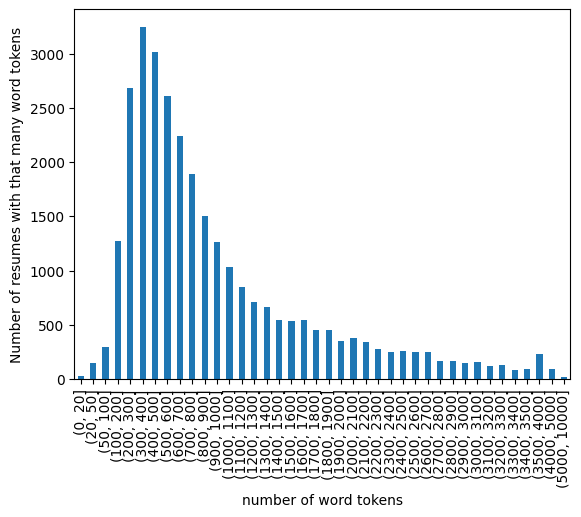

buckets_count_skills_jobads:    counts
0    1181
1     274
2     511
3     502
4     683
bins_cutoff: [0, 20, 50, 100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 4000, 5000, 10000]
buckets_count_skills_jobads:        counts        bucket
0        1181  (1000, 1250]
1         274    (250, 500]
2         511    (500, 750]
3         502    (500, 750]
4         683    (500, 750]
...       ...           ...
29778    3074  (3000, 4000]
29779    1538  (1500, 1750]
29780    2541  (2500, 2750]
29781     120    (100, 250]
29782     705    (500, 750]

[29783 rows x 2 columns]
bins: [(1000, 1250], (250, 500], (500, 750], (2250, 2500], (2000, 2250], ..., (4000, 5000], (2750, 3000], (20, 50], (5000, 10000], (0, 20]]
Length: 18
Categories (18, interval[int64, right]): [(0, 20] < (20, 50] < (50, 100] < (100, 250] ... (2750, 3000] < (3000, 4000] < (4000, 5000] < (5000, 10000]]


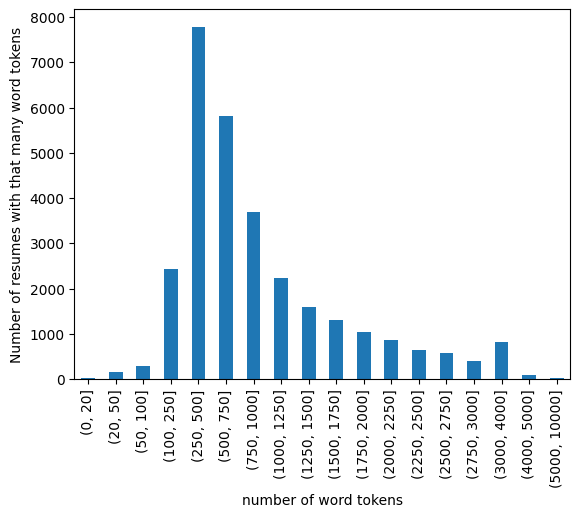

In [19]:
df = dataset_cv

def show_values_in_buckets(list_values,bins_cutoff):

    df = pd.DataFrame(list_values,columns=["counts"])
    print("buckets_count_skills_jobads:",df.head())
    
    print("bins_cutoff:",bins_cutoff)
    df["bucket"] = pd.cut(df.counts, bins_cutoff)
    print("buckets_count_skills_jobads:",df)


    bins = df['bucket'].unique().dropna()
    print("bins:",bins)
    ordered_bins = np.sort(bins)


    df['bucket'].value_counts()[ordered_bins].plot(kind='bar')
    plt.xlabel('number of word tokens')
    plt.ylabel('Number of resumes with that many word tokens')
    plt.show()

    return df

def show_values_in_n_buckets(size_bucket,list_values,max_value):
    bins_cutoff = np.arange(0,max_value,size_bucket)

    df = show_values_in_buckets(list_values,bins_cutoff)

    return df


token_counts_list = df.token_count.values.tolist()

bins_cutoff = [0,20,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000
               ,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,3100,3200,3300,3400,3500,4000,5000,10000]
df_with_bins = show_values_in_buckets(token_counts_list,bins_cutoff)


bins_cutoff = [0,20,50,100,250,500,750,1000,1250,1500,1750,2000
               ,2250,2500,2750,3000,4000,5000,10000]

df_with_bins = show_values_in_buckets(token_counts_list,bins_cutoff)

buckets_count_skills_jobads:    counts
0    7816
1    2057
2    3486
3    3623
4    4753
bins_cutoff: [    0   500  1000  1500  2000  2500  3000  3500  4000  4500  5000  5500
  6000  6500  7000  7500  8000  8500  9000  9500 10000 10500 11000 11500
 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500
 18000 18500 19000 19500 20000 20500 21000 21500 22000 22500 23000 23500
 24000 24500]
buckets_count_skills_jobads:        counts          bucket
0        7816    (7500, 8000]
1        2057    (2000, 2500]
2        3486    (3000, 3500]
3        3623    (3500, 4000]
4        4753    (4500, 5000]
...       ...             ...
29778   22011  (22000, 22500]
29779    9586   (9500, 10000]
29780   17130  (17000, 17500]
29781     782     (500, 1000]
29782    4639    (4500, 5000]

[29783 rows x 2 columns]
bins: [(7500, 8000], (2000, 2500], (3000, 3500], (3500, 4000], (4500, 5000], ..., (15500, 16000], (18000, 18500], (20000, 20500], (21000, 21500], (23500, 24000]]
Length: 49
Cate

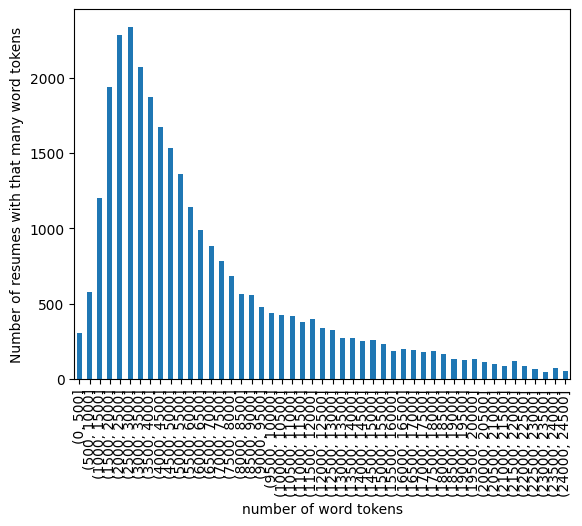

text  skills_required  \
0  database administrator database administrator ...              NaN   
1  database administrator database administrator ...              NaN   
2  oracle database administrator oracle database ...              NaN   
3  amazon redshift administrator and etl develope...              NaN   
4  scrum master scrum master scrum master richmon...              NaN   

   token_count  length  
0         1181    7816  
1          274    2057  
2          511    3486  
3          502    3623  
4          683    4753

In [20]:
df['length'] = df['text'].astype(str).apply(len)

bins_cutoff = [0,25,50,100,250,500,750,1000,1250,1500,1750,2000
               ,2250,2500,2750,3000,3250,3500,3750,4000,4250,4500,4750
               ,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,15000,20000,25000,50000,100000]

df_with_bins = show_values_in_n_buckets(500,df['length'].values.tolist(),25000)


df.head()

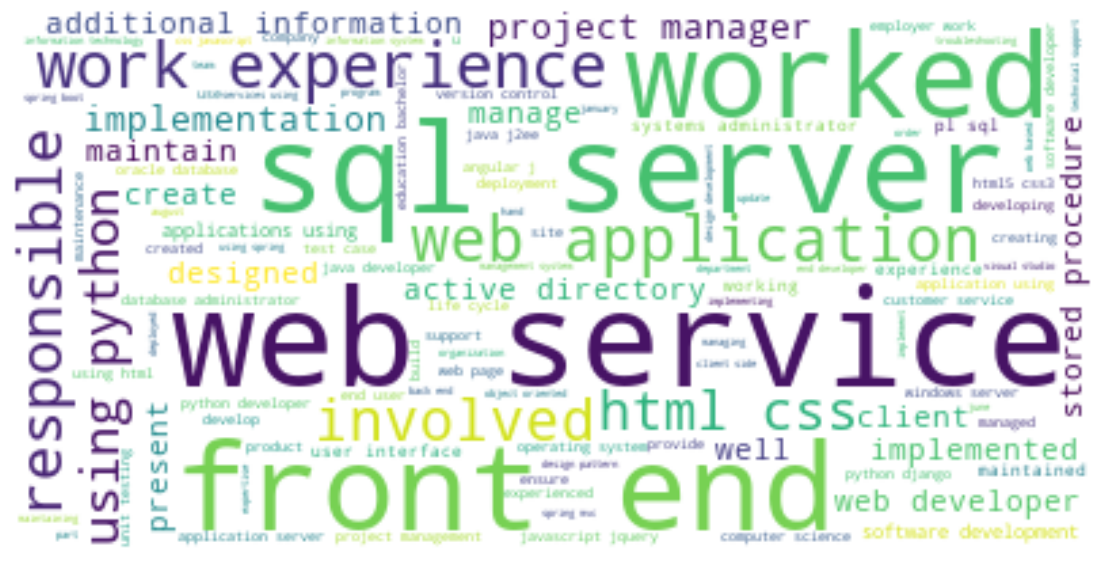

In [21]:
text = " ".join(review for review in df.text)

#Using this text block, I created the word cloud. Look before making the word cloud I get rid of some more words that 
# I thought not necessary. If you want, you can clean it up further.

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

df = dataset_cv
#TODO remove the stopwords beforeword analysis

def get_top_n_words(corpus, n=None):
    vec= CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text'], 100)
df1 = pd.DataFrame(common_words, columns = ['text', 'count'])
df1.head(20)

text    count
0           and  1574437
1            to   750930
2           the   626437
3            in   479517
4            of   458393
5           for   457597
6          with   293540
7         using   273633
8            on   211432
9          data   184848
10          web   181465
11           as   137806
12   experience   132931
13  application   132552
14  development   120085
15         used   118648
16       server   118114
17     database   115056
18          sql   114543
19   management   114295

### other measurements?

- length (in characters) ?useful?
- The distribution of top unigrams after removing stop words
- 
- TODOOOOOO?